# SARIMA Forecasting Simple
Following the tutorial ["Kaggle SARIMA"](https://www.kaggle.com/code/nholloway/seasonality-and-sarimax)


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox, kurtosis, skew
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

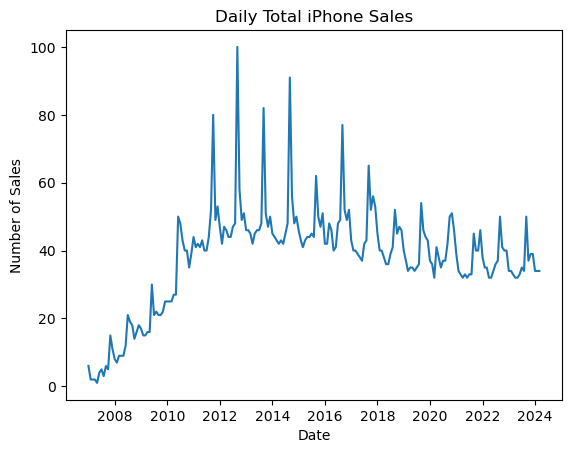

In [5]:
# Load the dataset
data = pd.read_csv('iphone_sales.csv')

# rename columns
data.columns = ['date', 'sales']

# Convert the date column to a datestamp type
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Plot the time series
plt.plot(data['sales'])
plt.title('Daily Total iPhone Sales')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.show()

In [7]:
# drop data from before date 2012-01-01
data = data.loc['2012-01-01':]
data.head()

,sales
date,
2012-01-01,47
2012-02-01,42
2012-03-01,47
2012-04-01,46
2012-05-01,44


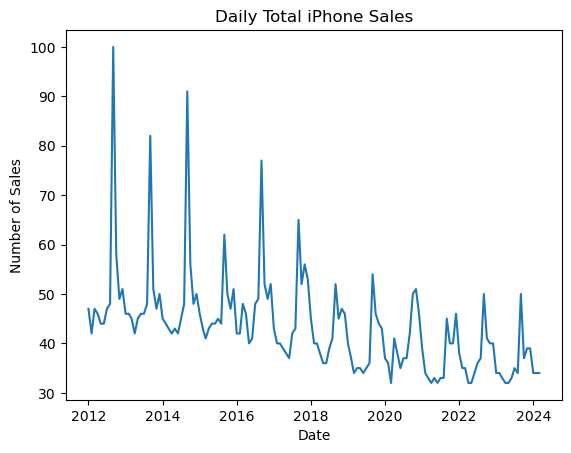

In [8]:
# Plot the time series
plt.plot(data['sales'])
plt.title('Daily Total iPhone Sales')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.show()

## Check for Stationarity

In [9]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['sales'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -0.882576
p-value: 0.793656


p-value is above 0.05 so data does not meet the stationarity requirement.

## Remove Trend

In [12]:
# Calculate the first difference of the time series
data['data_sales'] = data['sales'].diff()

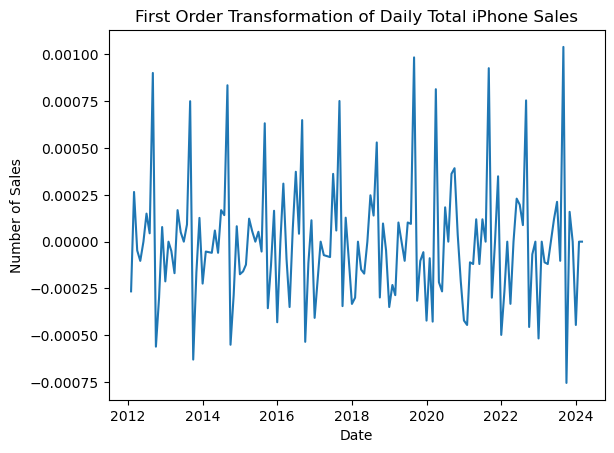

In [15]:
# plot the time series of data1_sales
plt.plot(data['data1_sales'])
plt.title('First Order Transformation of Daily Total iPhone Sales')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.show()


In [17]:
adf_test = adfuller(data['data_sales'].dropna())
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -7.112502
p-value: 0.000000


c:\Users\Dagart\anaconda3\envs\data_science_env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


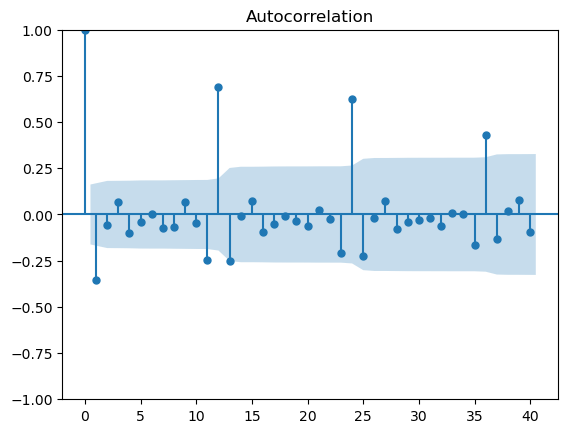

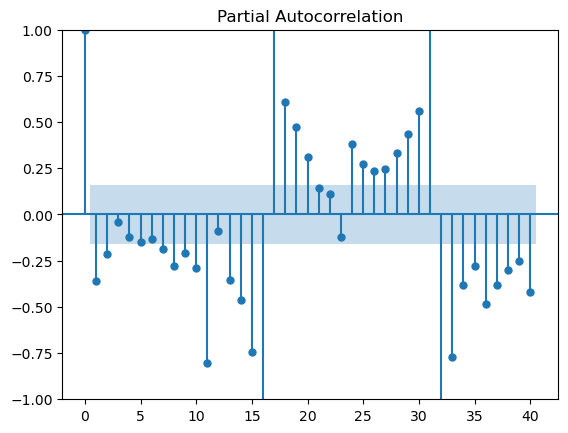

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['data_sales'].dropna(), lags=40)
plot_pacf(data['data_sales'].dropna(), lags=40)
plt.show()

Use the Autocorrelation and Partial Autocorrelation plots to find p and q for the ARIMA (p, d, q) values.

In [18]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['births'], order=(1, 0, 1))
model_fit = model.fit()

# adjust the steps for the number of days to forecast
forecast = model_fit.get_forecast(steps=30)

test_forecast_series = pd.Series(forecast.predicted_mean)

c:\Users\Dagart\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Dagart\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Dagart\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [19]:
# view the forecast
print("Min Training Date:", data.index.min())
print("Min Forecast Date:", test_forecast_series.index.min())
print("Max Forecast Date:", test_forecast_series.index.max())
print('Number of Forecast Observations:', len(test_forecast_series))

print(test_forecast_series.tail(10))

Min Training Date: 1959-01-01 00:00:00
Min Forecast Date: 1960-01-01 00:00:00
Max Forecast Date: 1960-01-30 00:00:00
Number of Forecast Observations: 30
1960-01-21    43.045795
1960-01-22    43.021433
1960-01-23    42.997559
1960-01-24    42.974163
1960-01-25    42.951236
1960-01-26    42.928767
1960-01-27    42.906749
1960-01-28    42.885171
1960-01-29    42.864025
1960-01-30    42.843302
Freq: D, Name: predicted_mean, dtype: float64


## Test the Model Performance

c:\Users\Dagart\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Dagart\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Dagart\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


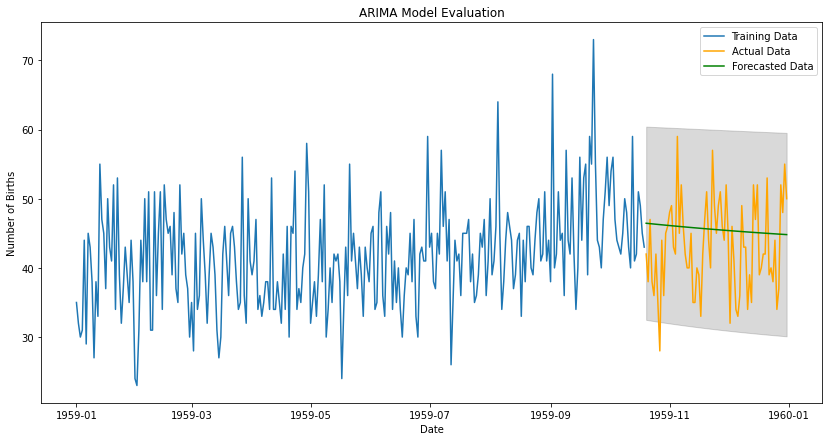

RMSE: 6.970853395332547


In [20]:
# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['births'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['births'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['births'], label='Training Data')
plt.plot(test['births'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

print('RMSE:', rmse)